In [ ]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
#import dataset

df = pd.read_csv('CR300Series_2_Daily.csv')

In [ ]:
#informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIMESTAMP    1091 non-null   object 
 1   RECORD       1091 non-null   float64
 2   BattV        1091 non-null   float64
 3   PTemp_C_Max  1091 non-null   float64
 4   BP_mbar_Avg  1091 non-null   float64
 5   AirTC_Avg    1091 non-null   float64
 6   AirTC_Max    1091 non-null   float64
 7   AirTC_Min    1091 non-null   float64
 8   RH           1091 non-null   float64
 9   WS_ms_Avg    1091 non-null   float64
 10  WS_ms_Max    1091 non-null   float64
 11  WindDir      1091 non-null   float64
 12  Rain_mm_Tot  1091 non-null   float64
 13  Radiasi_Avg  1091 non-null   object 
 14  Radiasi_Tot  1091 non-null   object 
dtypes: float64(12), object(3)
memory usage: 128.3+ KB


In [ ]:
#deskripsi dataset

df.describe()

,RECORD,BattV,PTemp_C_Max,BP_mbar_Avg,AirTC_Avg,AirTC_Max,AirTC_Min,RH,WS_ms_Avg,WS_ms_Max,WindDir,Rain_mm_Tot
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.00000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,545.000000,12.852576,36.689899,927.828288,23.621714,28.828231,20.10275,90.161045,1.907470,9.259102,175.357470,5.017140
std,315.088876,0.023514,2.424252,3.088928,0.974907,2.526358,3.91833,7.680800,0.658151,1.892927,101.941891,9.801345
min,0.000000,12.770000,26.670000,922.997700,20.990000,22.600000,-39.00000,60.500000,0.530000,4.610000,0.000000,0.000000
25%,272.500000,12.840000,35.415000,925.997500,23.040000,28.100000,19.80000,85.350000,1.426000,7.830000,75.000000,0.000000
50%,545.000000,12.850000,36.890000,926.991900,23.630000,28.900000,20.40000,92.000000,1.775000,9.080000,200.000000,0.400000
75%,817.500000,12.870000,38.175000,928.526200,24.200000,29.700000,20.90000,96.250000,2.255000,10.570000,258.500000,5.900000
max,1090.000000,12.930000,45.900000,949.981000,41.850000,98.100000,22.90000,100.000000,5.156000,19.340000,351.000000,120.000000


In [ ]:
#menampilkan baris yang berisi null

print(df.isnull().sum())

TIMESTAMP      3
RECORD         3
BattV          3
PTemp_C_Max    3
BP_mbar_Avg    3
AirTC_Avg      3
AirTC_Max      3
AirTC_Min      3
RH             3
WS_ms_Avg      3
WS_ms_Max      3
WindDir        3
Rain_mm_Tot    3
Radiasi_Avg    3
Radiasi_Tot    3
dtype: int64


In [ ]:
#menghapus baris berisi null

df = df.dropna()

In [ ]:
#mengecek null

print(df.isnull().sum())

TIMESTAMP      0
RECORD         0
BattV          0
PTemp_C_Max    0
BP_mbar_Avg    0
AirTC_Avg      0
AirTC_Max      0
AirTC_Min      0
RH             0
WS_ms_Avg      0
WS_ms_Max      0
WindDir        0
Rain_mm_Tot    0
Radiasi_Avg    0
Radiasi_Tot    0
dtype: int64


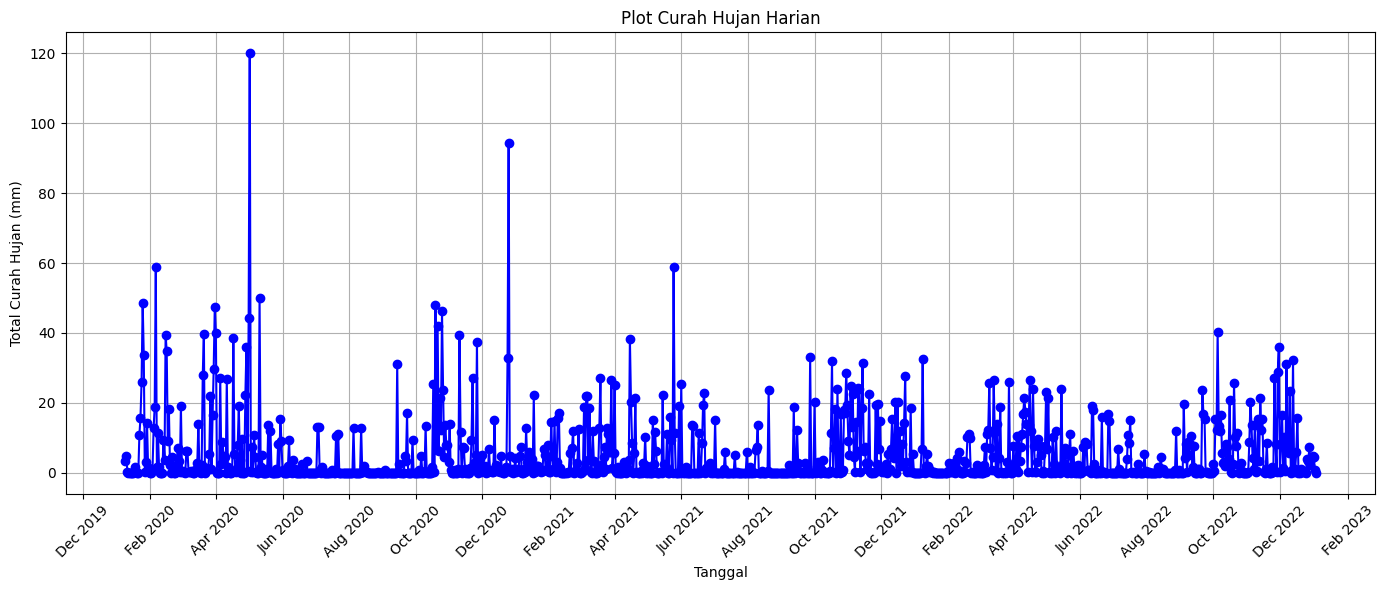

In [ ]:
#Konversi TIMESTAMP menjadi datetime
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format='%m/%d/%Y %H:%M', errors='coerce')

#Konversi curah hujan ke numerik
df['Rain_mm_Tot'] = pd.to_numeric(df['Rain_mm_Tot'], errors='coerce')

#Menghapus baris dengan nilai tidak valid
df = df.dropna(subset=['TIMESTAMP', 'Rain_mm_Tot'])

# Ploting
plt.figure(figsize=(14, 6))
plt.plot(df['TIMESTAMP'], df['Rain_mm_Tot'], marker='o', linestyle='-', color='b')

plt.xlabel('Tanggal')
plt.ylabel('Total Curah Hujan (mm)')
plt.title('Plot Curah Hujan Harian')
plt.grid(True)

# Format tanggal pada sumbu x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

#mengatur agar tidak tumpang tindih
plt.tight_layout()

#menyimpan hasil ploting untuk di download
plt.savefig("plot_curah_hujan.png", dpi=300)

#menampilkan hasil ploting
plt.show()

In [ ]:
#Membuat data baru dengan mengambil variabel yang dibutuhkan saja
df = df[['BP_mbar_Avg','AirTC_Avg', 'AirTC_Max', 'AirTC_Min','RH','WS_ms_Avg','WS_ms_Max','WindDir','Rain_mm_Tot']]

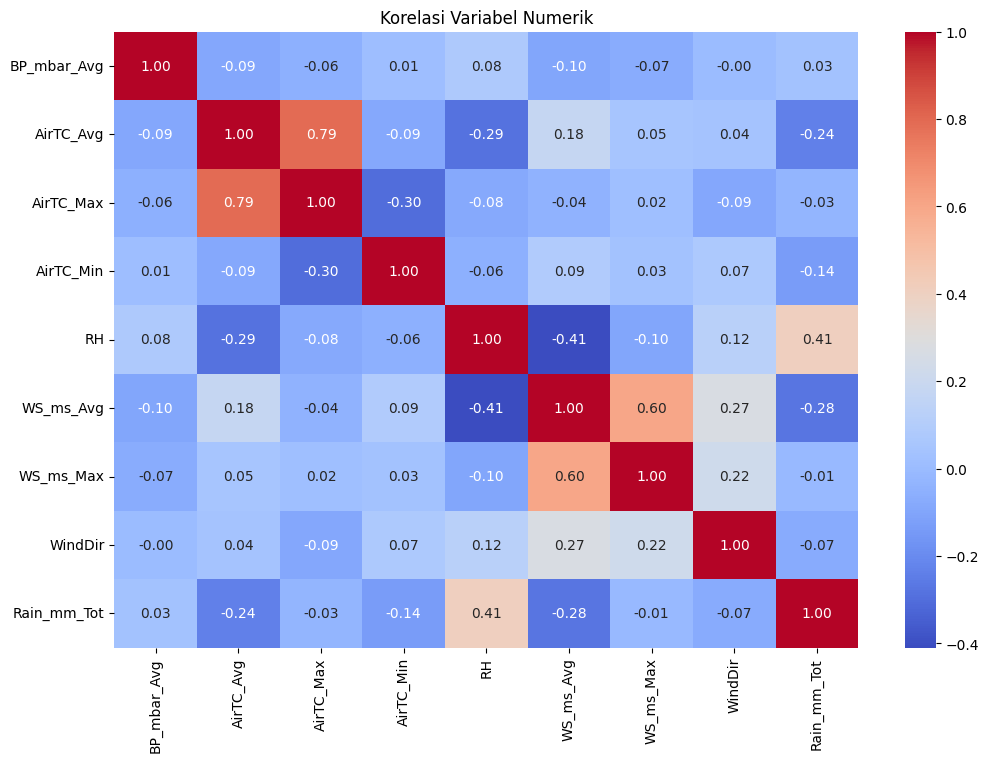

In [ ]:
#Korelasi variabel numerik

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Variabel Numerik')

plt.savefig("korelasi_antar_variabel.png", dpi=300, bbox_inches ='tight' )
plt.show()


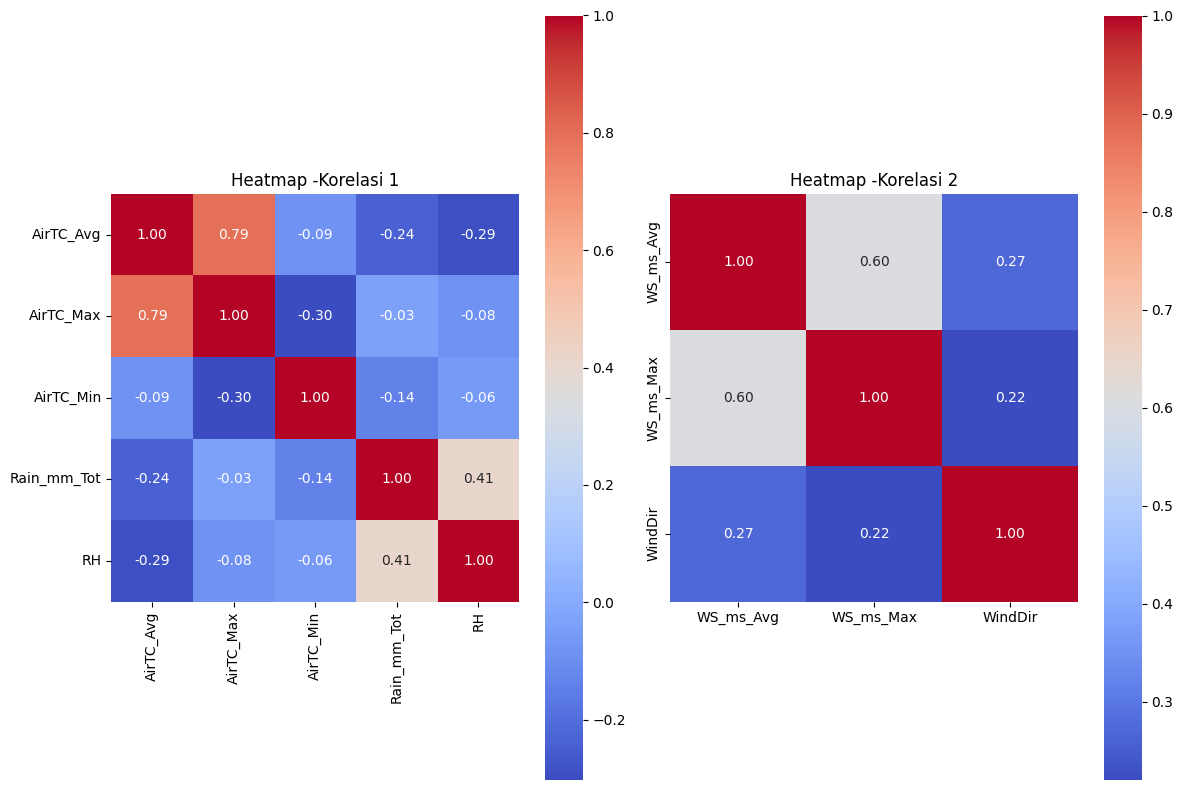

In [ ]:
#korelasi antar variabel

#variabel yang ingin dihitung korelasinya
selected1 = ['AirTC_Avg','AirTC_Max','AirTC_Min','Rain_mm_Tot','RH']
selected2 = ['WS_ms_Avg','WS_ms_Max','WindDir']

selected = [selected1, selected2]
titles = ['Korelasi 1', 'Korelasi 2']
plt.figure(figsize=(12,8))


for i, (sel, title) in enumerate(zip(selected, titles)):
  corr = df[sel].corr()
  plt.subplot(1,2, i+1)
  sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
  plt.title(f'Heatmap -{title}')


plt.tight_layout()
plt.savefig("korelasi1dan2.png")
plt.show()